# Explore here

In [122]:
import pandas as pd

try:
    df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
    print("Data loaded successfully.")
    print("First 5 rows:")
    print(df.head())
    print("\nData Info:")
    df.info()
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded successfully.
First 5 rows:
                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [123]:
import pandas as pd

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Sort the index to ensure chronological order (important for time series)
df.sort_index(inplace=True)

# Now, the 'sales' column indexed by the 'date' is your time series
ts_data = df['sales']

print("Time Series Data Structure (after processing):")
print(ts_data.head())
print("\nTime Series Info (after processing):")
ts_data.info()

Time Series Data Structure (after processing):
date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

Time Series Info (after processing):
<class 'pandas.core.series.Series'>
DatetimeIndex: 366 entries, 2022-09-03 17:10:08.079328 to 2023-09-03 17:10:08.079328
Series name: sales
Non-Null Count  Dtype  
--------------  -----  
366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


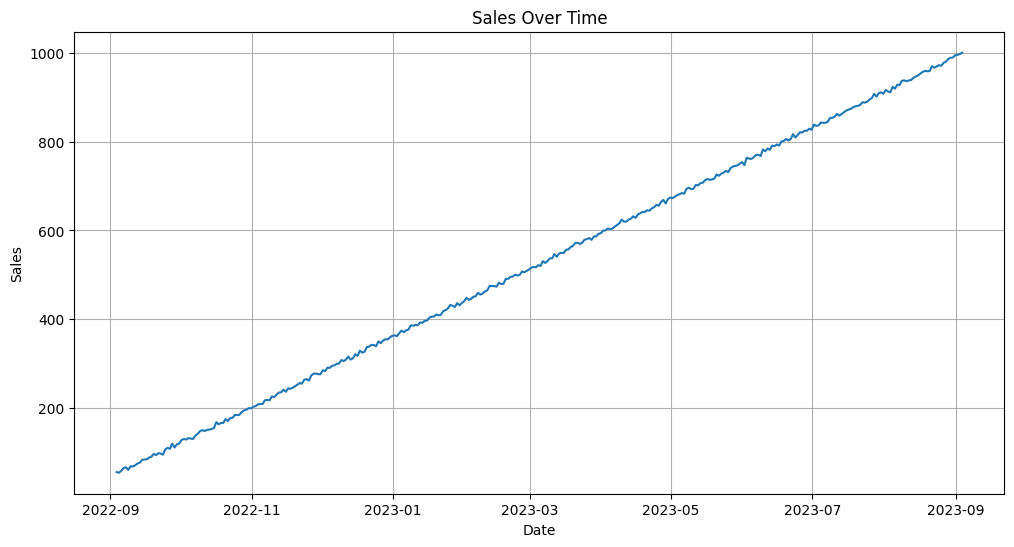

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ts_data)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [125]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_data)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

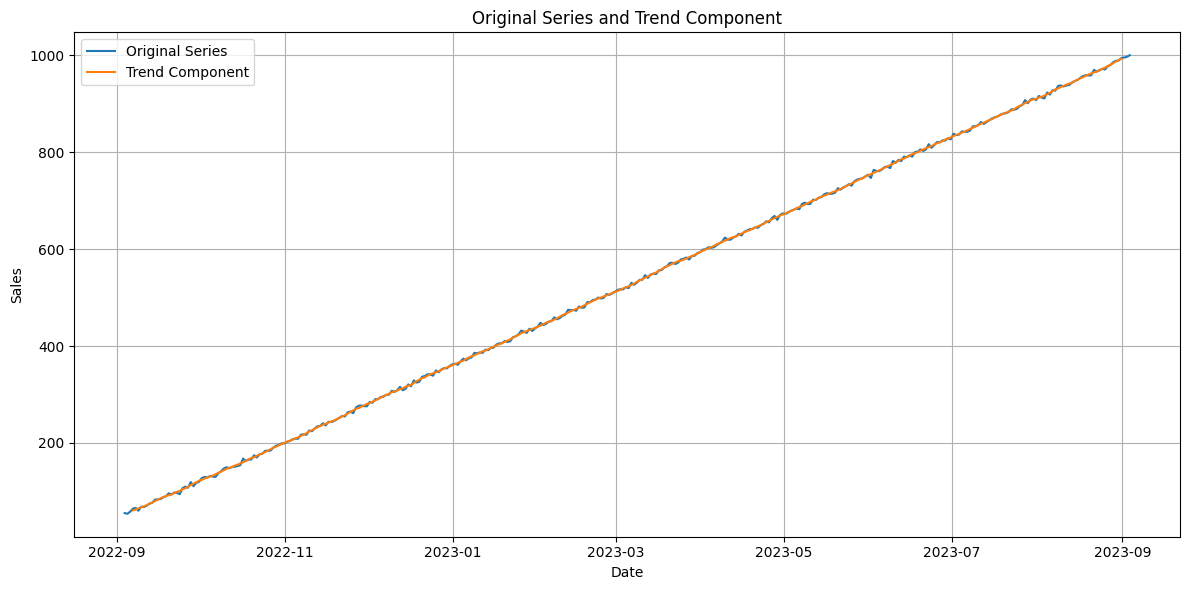


Seasonal Decomposition Components:
Trend Head:
date
2022-09-03 17:10:08.079328          NaN
2022-09-04 17:10:08.079328          NaN
2022-09-05 17:10:08.079328          NaN
2022-09-06 17:10:08.079328    60.904309
2022-09-07 17:10:08.079328    62.686159
Name: trend, dtype: float64

Seasonality Head:
date
2022-09-03 17:10:08.079328    0.637205
2022-09-04 17:10:08.079328    0.685388
2022-09-05 17:10:08.079328    0.551760
2022-09-06 17:10:08.079328    0.132276
2022-09-07 17:10:08.079328   -0.197866
Name: seasonal, dtype: float64

Residual Head:
date
2022-09-03 17:10:08.079328         NaN
2022-09-04 17:10:08.079328         NaN
2022-09-05 17:10:08.079328         NaN
2022-09-06 17:10:08.079328    3.494314
2022-09-07 17:10:08.079328    3.525340
Name: resid, dtype: float64


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

try:
    decomposition = seasonal_decompose(ts_data, model='additive', period=7)

    # Extract the trend component
    trend = decomposition.trend

    # Plot the original time series and the trend
    fig, axis = plt.subplots(figsize=(12, 6)) # Adjusted figsize slightly for better viewing
    sns.lineplot(data=ts_data, label='Original Series')
    sns.lineplot(data=trend, label='Trend Component')
    axis.set_title('Original Series and Trend Component')
    axis.set_xlabel('Date')
    axis.set_ylabel('Sales')
    axis.grid(True)
    axis.legend()
    plt.tight_layout()
    plt.show()

    print("\nSeasonal Decomposition Components:")
    print("Trend Head:")
    print(trend.head())
    print("\nSeasonality Head:")
    print(decomposition.seasonal.head())
    print("\nResidual Head:")
    print(decomposition.resid.head())

except Exception as e:
    print(f"An error occurred during decomposition or plotting: {e}")

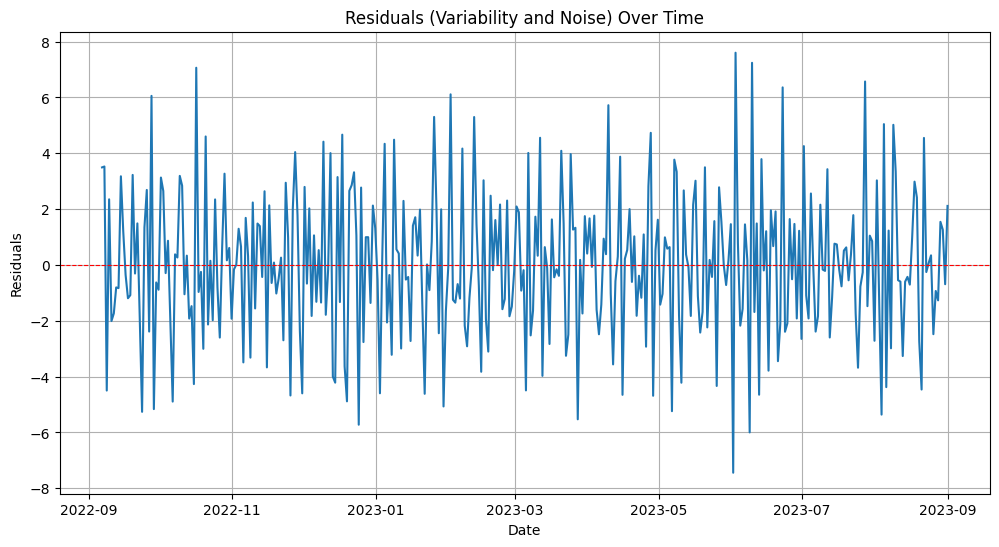

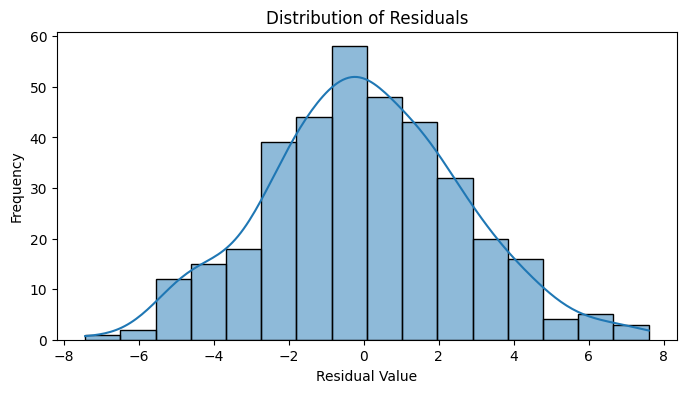

In [127]:
# Extract the residual component
residuals = decomposition.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
sns.lineplot(data=residuals)
plt.title('Residuals (Variability and Noise) Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Add a horizontal line at zero
plt.show()

# Optional: Plot histogram or density plot to see the distribution of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals.dropna(), kde=True) # Use dropna() to exclude NaN values
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

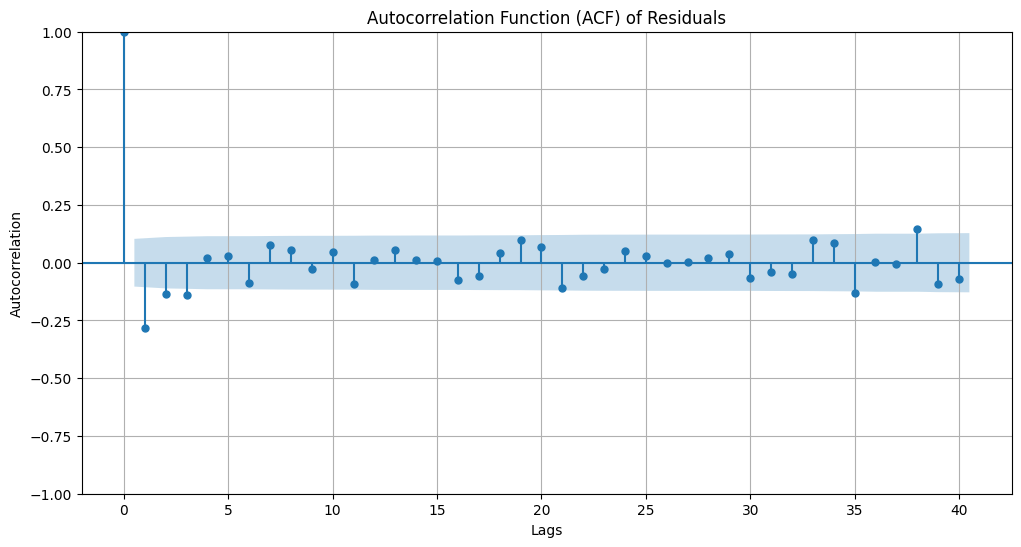

In [128]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the Autocorrelation Function (ACF) of the residuals
# Use dropna() to handle the NaN values at the start/end
if not residuals.dropna().empty:
    plt.figure(figsize=(12, 6))
    plot_acf(residuals.dropna(), lags=40, ax=plt.gca()) # Plot for the first 40 lags
    plt.title('Autocorrelation Function (ACF) of Residuals')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()
else:
    print("Cannot plot ACF: Residuals are empty after dropping NaNs.")

In [129]:
ts_data_cleaned = ts_data.dropna()

if not ts_data_cleaned.empty:
    print("Performing Augmented Dickey-Fuller Test...")
    adf_test = adfuller(ts_data_cleaned)

    print(f'ADF Statistic: {adf_test[0]}')
    print(f'p-value: {adf_test[1]}')
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print(f'\t{key}: {value}')

    # Interpret the results
    alpha = 0.05 # Significance level
    print("\nInterpretation:")
    if adf_test[1] <= alpha:
        print(f"p-value ({adf_test[1]:.4f}) <= {alpha}. Reject the null hypothesis.")
        print("Conclusion: The time series appears to be stationary.")
    else:
        print(f"p-value ({adf_test[1]:.4f}) > {alpha}. Fail to reject the null hypothesis.")
        print("Conclusion: The time series appears to be non-stationary.")
else:
    print("Cannot perform ADF test: Time series data is empty or contains only NaNs.")


Performing Augmented Dickey-Fuller Test...
ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063
Critical Values:
	1%: -3.4490648539347544
	5%: -2.8697861692116478
	10%: -2.5711631253228306

Interpretation:
p-value (0.9862) > 0.05. Fail to reject the null hypothesis.
Conclusion: The time series appears to be non-stationary.


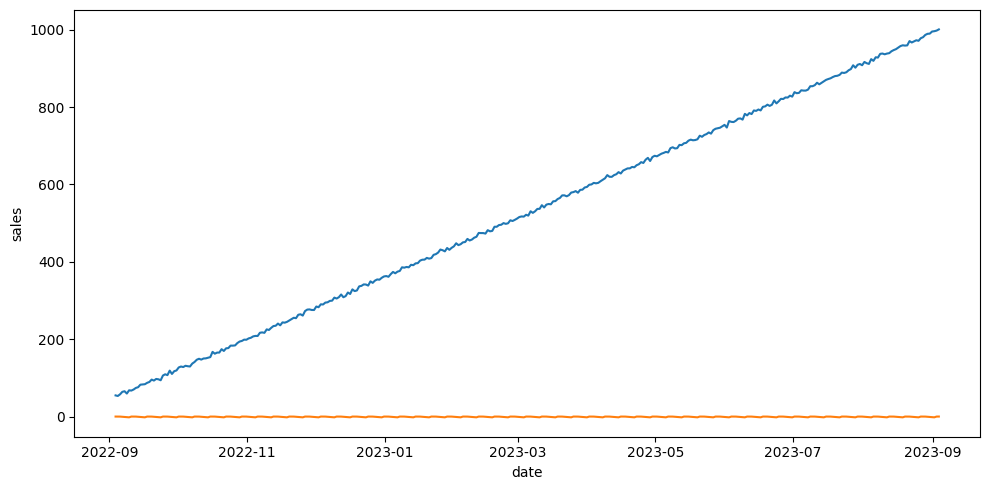

In [130]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_data)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

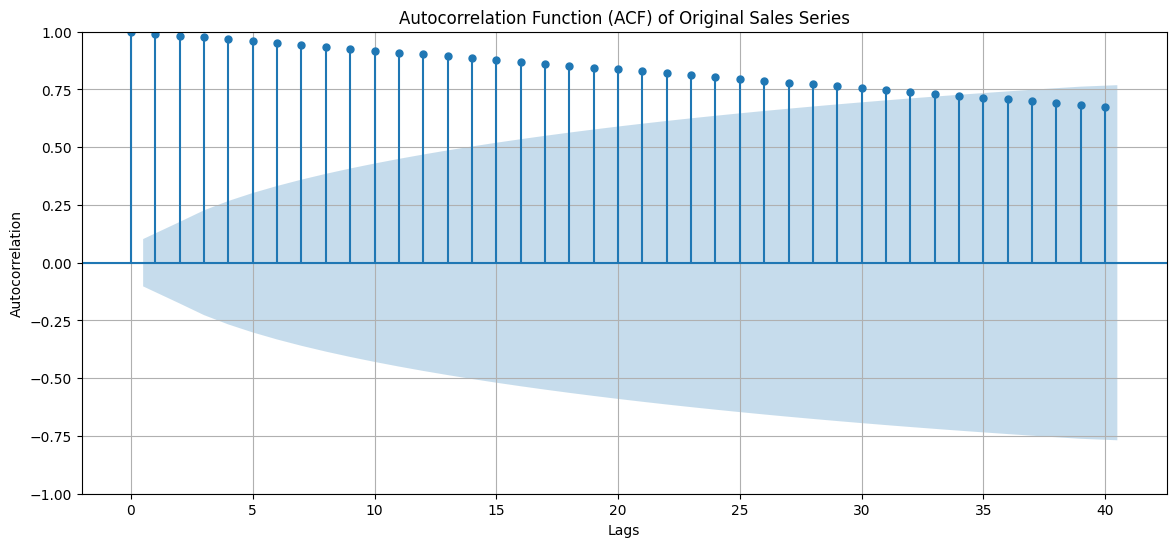

In [131]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(14, 6))
plot_acf(ts_data.dropna(), lags=40, ax=plt.gca()) # Plot for the first 40 lags
plt.title('Autocorrelation Function (ACF) of Original Sales Series')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot the Partial Autocorrelation Function (PACF)
#plt.figure(figsize=(14, 6))
#plot_pacf(ts_data.dropna(), lags=40, ax=plt.gca()) # Plot for the first 40 lags
#plt.title('Partial Autocorrelation Function (PACF) of Original Sales Series')
#plt.xlabel('Lags')
#plt.ylabel('Partial Autocorrelation')
#plt.grid(True)
#plt.show()

In [132]:
train_size = int(len(ts_data) * 0.95) # Use 80% for training, 20% for testing
train_data, test_data = ts_data[0:train_size], ts_data[train_size:]

print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 347
Testing data size: 19


In [133]:
from statsmodels.tsa.arima.model import ARIMA

# --- ARIMA Model Training ---
# Define the order (p, d, q)
# p and q need to be determined, but let's start with p=5, d=1, q=0 as an example
order = (16, 1, 0) # Example order

print(f"\nTraining ARIMA model with order {order}...")

try:
    # Instantiate and fit the ARIMA model
    # Use .values if your statsmodels version requires numpy array, though it often works with Series
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()

    print("Model training complete.")
    print(model_fit.summary())

except Exception as e:
    print(f"An error occurred during ARIMA model training: {e}")


Training ARIMA model with order (16, 1, 0)...


/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model training complete.
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  347
Model:                ARIMA(16, 1, 0)   Log Likelihood                -888.074
Date:                Wed, 14 May 2025   AIC                           1810.149
Time:                        23:35:02   BIC                           1875.538
Sample:                    09-03-2022   HQIC                          1836.187
                         - 08-15-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8856      0.053    -16.555      0.000      -0.990      -0.781
ar.L2         -0.6526      0.074     -8.796      0.000      -0.798      -0.507
ar.L3         -0.4210      

Forecasting 19 steps...
Forecasting complete.

Sample Forecasts:
2023-08-16 17:10:08.079328    953.340966
2023-08-17 17:10:08.079328    955.586755
2023-08-18 17:10:08.079328    958.101648
2023-08-19 17:10:08.079328    960.805117
2023-08-20 17:10:08.079328    963.445110
Freq: D, Name: predicted_mean, dtype: float64


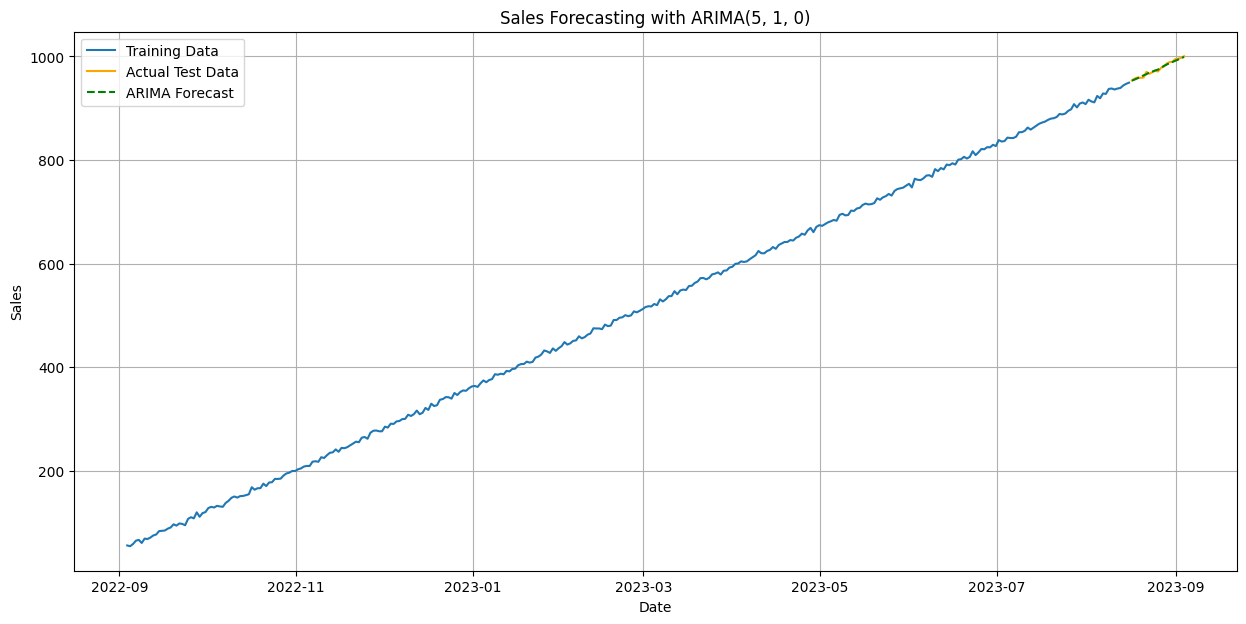

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Determine the number of steps to forecast (the length of the test data)
steps_to_forecast = len(test_data)

print(f"Forecasting {steps_to_forecast} steps...")

try:
    # Generate the forecasts
    # The forecast method returns a pandas Series with the forecasted values
    forecast_series = model_fit.forecast(steps=steps_to_forecast)

    print("Forecasting complete.")
    print("\nSample Forecasts:")
    print(forecast_series.head())

    # --- Visualize the results ---
    # It's very helpful to plot the training data, actual test data, and forecasts together

    plt.figure(figsize=(15, 7))

    # Plot training data
    plt.plot(train_data.index, train_data, label='Training Data')

    # Plot actual test data
    plt.plot(test_data.index, test_data, label='Actual Test Data', color='orange')

    # Plot forecasts
    plt.plot(forecast_series.index, forecast_series, label='ARIMA Forecast', color='green', linestyle='--')

    plt.title('Sales Forecasting with ARIMA(5, 1, 0)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred during forecasting or plotting: {e}")

In [135]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming test_data and forecast_series are available from your previous steps
# test_data: pandas Series with actual sales in the test period
# forecast_series: pandas Series with ARIMA forecasts for the test period

print("Calculating evaluation metrics...")

try:
    # Ensure test_data and forecast_series have the same index and length for comparison
    if not test_data.index.equals(forecast_series.index):
        print("Error: Index of test_data and forecast_series do not match. Cannot evaluate.")
    else:
        # Calculate Evaluation Metrics

        # Mean Squared Error (MSE)
        mse = mean_squared_error(test_data, forecast_series)
        print(f"Mean Squared Error (MSE): {mse:.4f}")

        # Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mse)
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

        # Mean Absolute Error (MAE)
        mae = mean_absolute_error(test_data, forecast_series)
        print(f"Mean Absolute Error (MAE): {mae:.4f}")

        # Mean Absolute Percentage Error (MAPE) - custom function
        def mean_absolute_percentage_error(y_true, y_pred):
            y_true, y_pred = np.array(y_true), np.array(y_pred)
            # Handle cases where y_true might be zero or very close to zero
            # Add a small epsilon to avoid division by zero
            epsilon = np.finfo(np.float64).eps
            return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

        # Calculate MAPE
        mape = mean_absolute_percentage_error(test_data, forecast_series)
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

except Exception as e:
    print(f"An error occurred during evaluation: {e}")

Calculating evaluation metrics...
Mean Squared Error (MSE): 4.8812
Root Mean Squared Error (RMSE): 2.2093
Mean Absolute Error (MAE): 1.8297
Mean Absolute Percentage Error (MAPE): 0.1878%
